In [1]:
import get_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import  stats
import statsmodels.api as sm

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
data = get_data.GetData()
day_balance = data.get_day_redeem()
timeseries = np.array(day_balance['total_redeem_amt'])
# min_max_scalar = MinMaxScaler()
# timeseries = min_max_scalar.fit_transform(timeseries.reshape(-1,1))

D:\workspace\Pycharm\get_data.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  day_redeem['report_date'] = pd.to_datetime(day_redeem['report_date'], format=('%Y%m%d'))


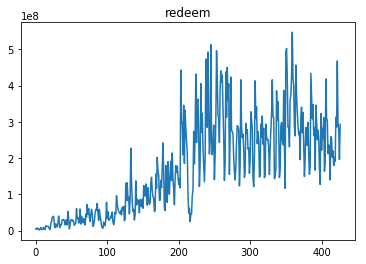

In [15]:
plt.plot(timeseries)
plt.title('redeem')
plt.show()

In [7]:
temp = np.array(timeseries)
t = sm.tsa.stattools.adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-1.37241
p-value,0.595428
Lags Used,13
Number of Observations Used,413
Critical Value(1%),-3.44628
Critical Value(5%),-2.86856
Critical Value(10%),-2.57051


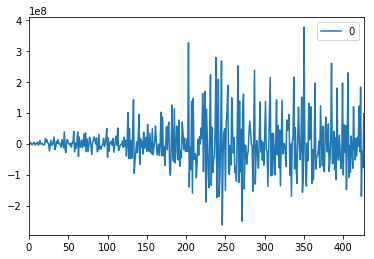

p-value:  1.6443717458500598e-21 


In [14]:
ts_diff1 = pd.DataFrame(timeseries).diff()
# print(np.array(ts_diff1[0])[1:])
ts_diff1.plot()
plt.show()
temp1 = np.array(ts_diff1[0])[1:]
t = sm.tsa.stattools.adfuller(temp1)  
print ("p-value:  {} ".format(t[1]))

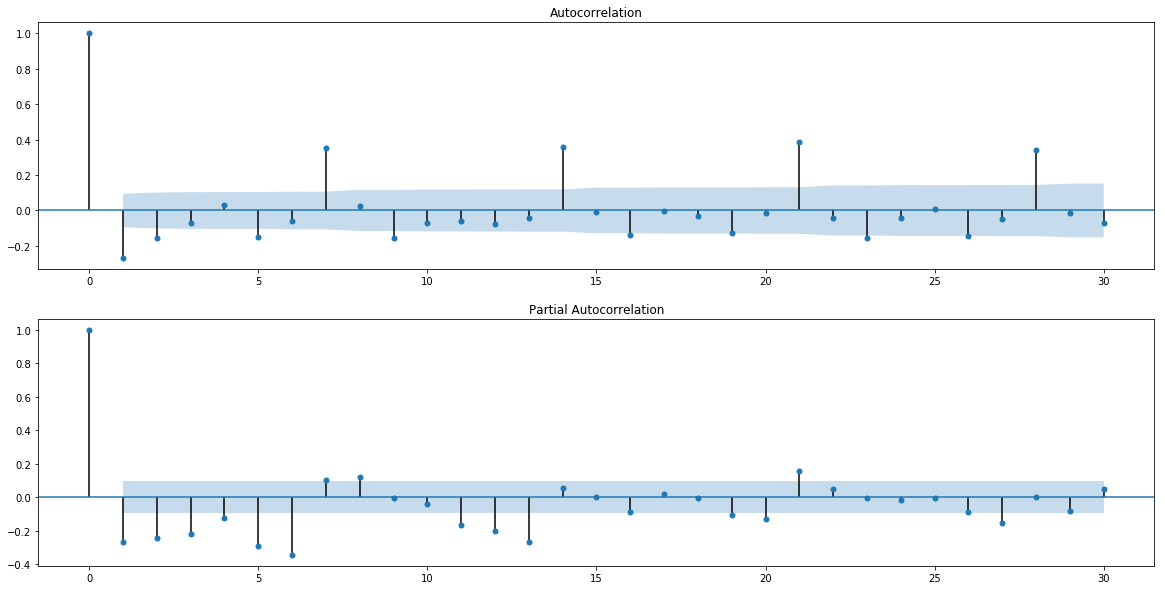

In [9]:
fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp1,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp1,lags=30,ax=ax2)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubd

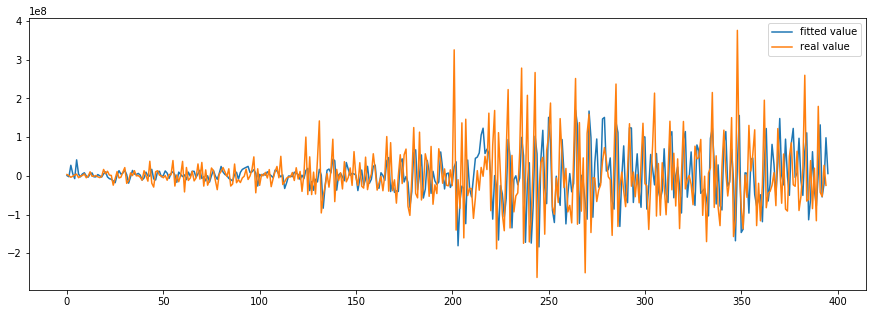

In [10]:
order = (5,5)
rawdata = np.array(temp1)
train = temp1[:-30]
test = temp1[-30:]
model = sm.tsa.ARMA(train,order).fit()

plt.figure(figsize=(15,5))
plt.plot(model.fittedvalues,label='fitted value')
plt.plot(train[1:],label='real value')
plt.legend(loc=0)
plt.show()

30


C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


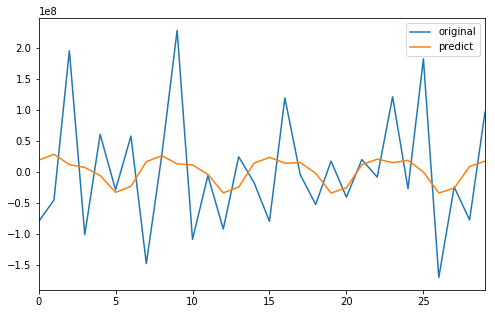

In [11]:
predicts = model.predict(10,387, dynamic=True)[-30:]
print(len(predicts))
comp = pd.DataFrame()
comp['original'] = test
comp['predict'] = predicts
comp.plot(figsize=(8,5))
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


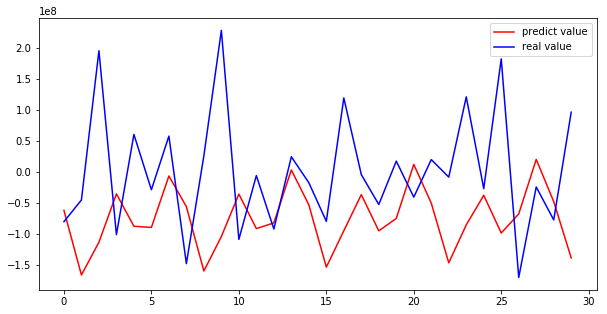

In [13]:
rec = [rawdata[-31]]
pre = model.predict(388, 417, dynamic=True) 
for i in range(30):
    rec.append(rec[i]+pre[i])
plt.figure(figsize=(10,5))
plt.plot(rec[-30:],'r',label='predict value')
plt.plot(rawdata[-30:],'b',label='real value')    
plt.legend(loc=0)
plt.show()